https://www.ieso.ca/en/Power-Data/Data-Directory
http://reports.ieso.ca/public/Demand/

```bash
touch PUB_Demand_2002_to_2022.csv
```
```bash
for year in {02..22}; do tail -n +4 "PUB_Demand_20$year.csv" >> PUB_Demand_2002_to_2022.csv; done
```

```bash
head PUB_Demand_2002_to_2022.csv
```

```csv
Date,Hour,Market Demand,Ontario Demand
2002-05-01,1,14141,14137
2002-05-01,2,13876,13872
2002-05-01,3,13974,13820
2002-05-01,4,13898,13744
2002-05-01,5,14378,14224
2002-05-01,6,15408,15404
2002-05-01,7,17070,17066
2002-05-01,8,17644,17640
2002-05-01,9,17723,17719
```

In [9]:
import pandas as pd

# Read the csv file
df = pd.read_csv('PUB_Demand_2002_to_2022_no_empty_lines.csv')

# Combine Date and Hour fields to create a datetime field
df['Datetime'] = pd.to_datetime(df['Date']) + pd.to_timedelta(df['Hour'] - 1, unit='h')

# Set the new datetime field as the index
df.set_index('Datetime', inplace=True)

# Drop the Date and Hour fields as they are no longer needed
df.drop(['Date', 'Hour'], axis=1, inplace=True)

In [10]:
# Create a date range that spans the entire time frame.
complete_date_range = pd.date_range(start="2002-05-01", end="2022-12-31 23:00:00", freq='H')

# Check for missing dates
missing_dates = complete_date_range[~complete_date_range.isin(df.index)]
print(f"Missing dates: {missing_dates}")

# Check for duplicate dates
duplicated_dates = df.index[df.index.duplicated()]
print(f"Duplicated dates: {duplicated_dates}")

Missing dates: DatetimeIndex([], dtype='datetime64[ns]', freq='H')
Duplicated dates: DatetimeIndex([], dtype='datetime64[ns]', name='Datetime', freq=None)


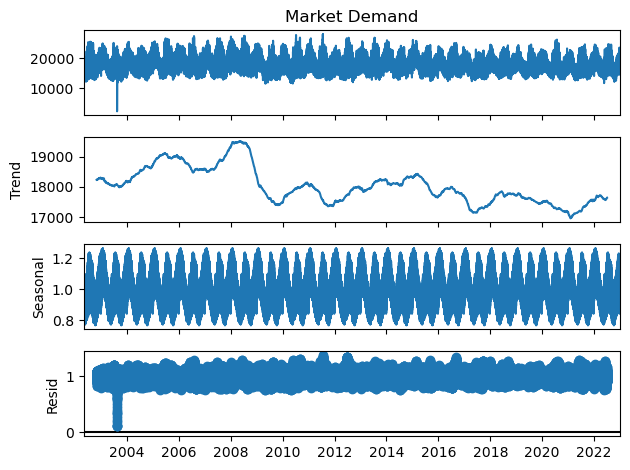

In [11]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# 'Market Demand' is the variable we're interested in 
series = df['Market Demand']

# Decompose the time series 
result = seasonal_decompose(series, model='multiplicative', period=8760)
result.plot()
plt.show()

In [24]:
# Make a "cleaned copy" (avoiding outliers), including only dates from 2006 onwards
df_cleaned = df[df.index >= "2006-01-01"]

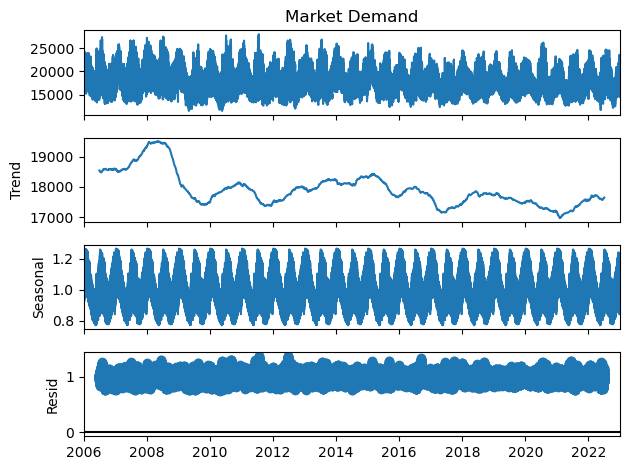

In [25]:
# 'Market Demand' is the variable we're interested in 
series_cleaned = df_cleaned['Market Demand']

# Decompose the time series 
result_cleaned = seasonal_decompose(series_cleaned, model='multiplicative', period=8760)
result_cleaned.plot()
plt.show()

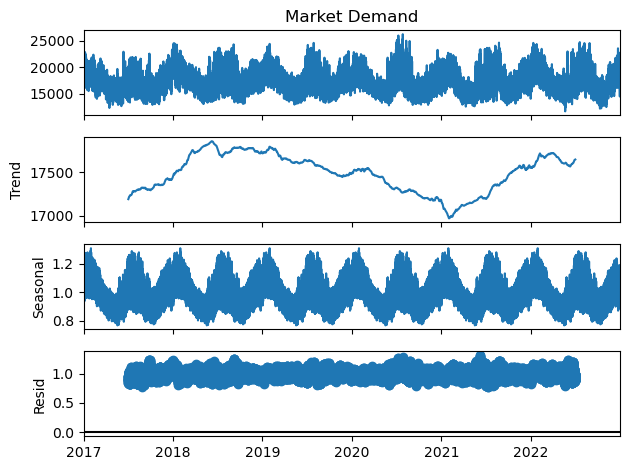

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Select the last five years of data
last_five_years = df_cleaned[df_cleaned.index.year >= df_cleaned.index.max().year - 5]

# Decompose the time series for the last five years
result = seasonal_decompose(last_five_years['Market Demand'], model='multiplicative', period=8760)

# Plot the decomposed time series
result.plot()
plt.show()

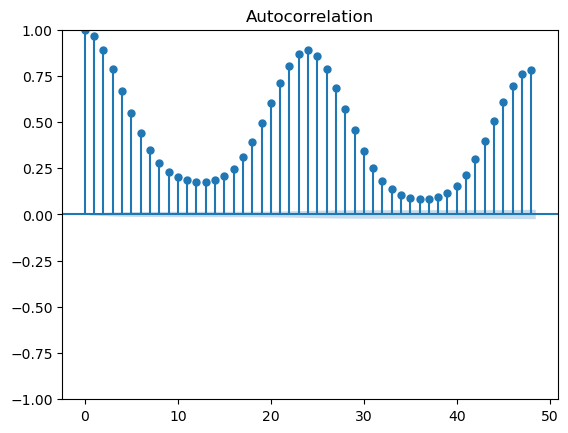

In [28]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation function for 'Market Demand' over a 24-hour window
plot_acf(df_cleaned['Market Demand'], lags=48)
plt.show()